In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from visual_behavior.data_access import loading as loading

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [4]:
import visual_behavior.visualization.utils as utils

import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.ophys.platform_paper_figures as ppf

### load experiments_table from cache

In [5]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
# print(cache_dir)

In [6]:
experiments_table = loading.get_platform_paper_experiment_table()
print(len(experiments_table))

1249


#### add useful columns

In [7]:
experiments_table = utilities.add_cell_type_column(experiments_table)
experiments_table = utilities.add_experience_exposure_column(experiments_table)
experiments_table = utilities.add_binned_depth_column(experiments_table)

### get useful info

In [8]:
experience_level = np.sort(experiments_table.experience_level.unique())
print(experience_level)

['Familiar' 'Novel 1' 'Novel >1']


In [9]:
exposures = np.sort(experiments_table.experience_exposure.unique())
print(exposures)

['Familiar 0' 'Familiar 1' 'Familiar 2' 'Familiar 3' 'Familiar > 3'
 'Novel 0' 'Novel 1' 'Novel 2' 'Novel 3' 'Novel > 3']


In [10]:
cell_types = np.sort(experiments_table.cell_type.unique() )
print(cell_types)

['Excitatory' 'Sst Inhibitory' 'Vip Inhibitory']


### get multi_session_df

In [64]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change']
use_events = True
filter_events = True

# load multi_session_df
multi_session_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(multi_session_df.ophys_experiment_id.unique()))

original_multi_session_df = multi_session_df.copy()

# keep changes only
multi_session_df = multi_session_df[multi_session_df.stimulus_change==True]

# limit to platform paper dataset
multi_session_df = multi_session_df[multi_session_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(multi_session_df.ophys_experiment_id.unique()))

# merge with metadata
multi_session_df = multi_session_df.merge(experiments_table, on='ophys_experiment_id')
print(len(multi_session_df.ophys_experiment_id.unique()))

multi_session_df = multi_session_df.reset_index(drop=True)

1941
1249
1249
Wall time: 32.9 s


### before any filtering

In [ ]:
df = multi_session_df.copy()
df = df.reset_index()

In [13]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  41                    280   
               Novel 1                   36                     71   
               Novel >1                  41                    196   
Sst Inhibitory Familiar                  19                    144   
               Novel 1                   15                     37   
               Novel >1                  19                    107   
Vip Inhibitory Familiar                  22                    217   
               Novel 1                   17                     47   
               Novel >1                  22                    150   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            88               18782  
               Novel 1                             71                9225  
               Novel >1                            88               15705  
Sst Inhibitory Familiar                            46                 738  
               Novel 1                             37                 414  
               Novel >1                            45                 678  
Vip Inhibitory Familiar                            69                1852  
               Novel 1                             47                 792  
               Novel >1                            66                1547

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


107


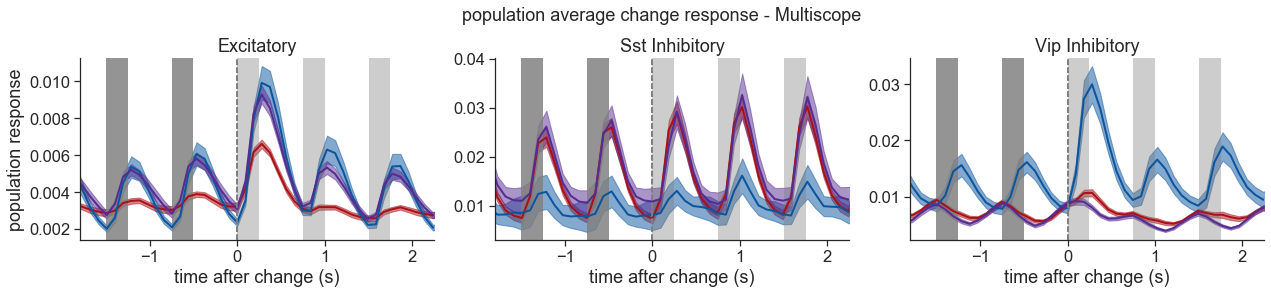

In [14]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### limit to containers with all 3 experience levels

In [15]:
df = multi_session_df.copy()
df = utilities.limit_to_containers_with_all_experience_levels(df)

In [16]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  36                    227   
               Novel 1                   36                     71   
               Novel >1                  36                    142   
Sst Inhibitory Familiar                  15                    115   
               Novel 1                   15                     37   
               Novel >1                  15                     85   
Vip Inhibitory Familiar                  17                    138   
               Novel 1                   17                     44   
               Novel >1                  17                     96   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            71               15268  
               Novel 1                             71                9225  
               Novel >1                            71               11962  
Sst Inhibitory Familiar                            37                 598  
               Novel 1                             37                 414  
               Novel >1                            37                 548  
Vip Inhibitory Familiar                            44                1233  
               Novel 1                             44                 742  
               Novel >1                            44                1067

107


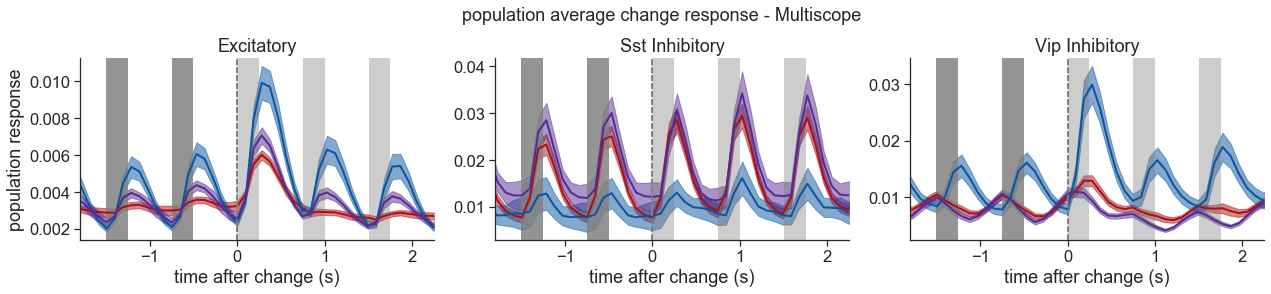

In [17]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### limit to containers with all 3 levels for closest active sessions

In [21]:
df = multi_session_df.copy()
df = utilities.limit_to_last_familiar_second_novel_active(df)
df = utilities.limit_to_containers_with_all_experience_levels(df)

In [22]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  34                     62   
               Novel 1                   34                     62   
               Novel >1                  34                     62   
Sst Inhibitory Familiar                  15                     30   
               Novel 1                   15                     30   
               Novel >1                  15                     30   
Vip Inhibitory Familiar                  17                     42   
               Novel 1                   17                     42   
               Novel >1                  17                     42   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            62                7302  
               Novel 1                             62                7974  
               Novel >1                            62                7544  
Sst Inhibitory Familiar                            30                 321  
               Novel 1                             30                 337  
               Novel >1                            30                 320  
Vip Inhibitory Familiar                            42                 794  
               Novel 1                             42                 718  
               Novel >1                            42                 765

107


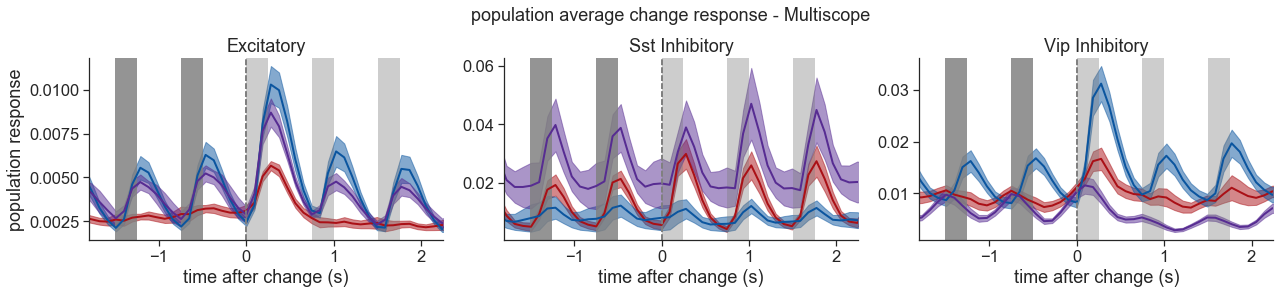

In [23]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

# remove traces with incorrect length - why does this happen?
df = df.reset_index(drop=True)
indices = [index for index in df.index if len(df.iloc[index].mean_trace) == len(df.mean_trace.values[100])]
df = df.loc[indices]

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### limit to matched cells in all 3

In [24]:
df = multi_session_df.copy()
df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

In [25]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  36                    226   
               Novel 1                   36                     71   
               Novel >1                  36                    142   
Sst Inhibitory Familiar                  15                    112   
               Novel 1                   15                     36   
               Novel >1                  15                     84   
Vip Inhibitory Familiar                  17                    137   
               Novel 1                   17                     44   
               Novel >1                  17                     96   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            71                5695  
               Novel 1                             71                5695  
               Novel >1                            71                5695  
Sst Inhibitory Familiar                            36                 292  
               Novel 1                             36                 292  
               Novel >1                            36                 292  
Vip Inhibitory Familiar                            44                 540  
               Novel 1                             44                 540  
               Novel >1                            44                 540

107


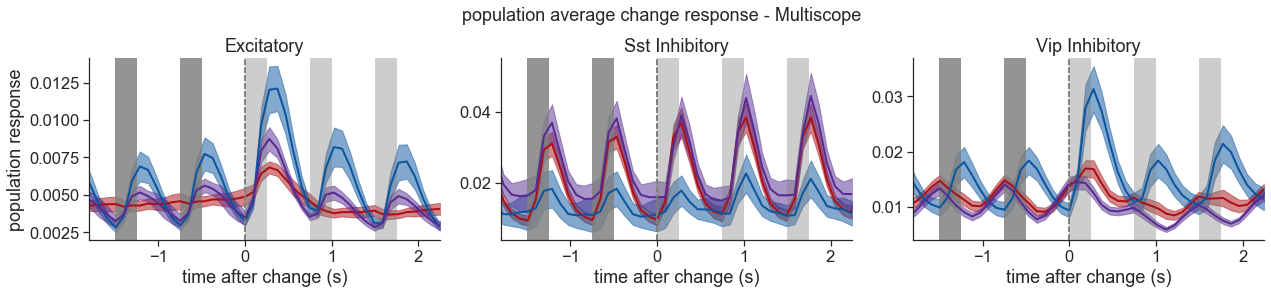

In [26]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### limit to matched cells in closest active sessions

In [27]:
df = multi_session_df.copy()
df = utilities.limit_to_last_familiar_second_novel_active(df)
df = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(df)

In [28]:
utilities.count_mice_expts_containers_cells(df)

n_mouse_id  n_ophys_experiment_id  \
cell_type      experience_level                                      
Excitatory     Familiar                  34                     62   
               Novel 1                   34                     62   
               Novel >1                  34                     62   
Sst Inhibitory Familiar                  14                     28   
               Novel 1                   14                     28   
               Novel >1                  14                     28   
Vip Inhibitory Familiar                  17                     41   
               Novel 1                   17                     41   
               Novel >1                  17                     41   

                                 n_ophys_container_id  n_cell_specimen_id  
cell_type      experience_level                                            
Excitatory     Familiar                            62                3326  
               Novel 1                             62                3326  
               Novel >1                            62                3326  
Sst Inhibitory Familiar                            28                 200  
               Novel 1                             28                 200  
               Novel >1                            28                 200  
Vip Inhibitory Familiar                            41                 415  
               Novel 1                             41                 415  
               Novel >1                            41                 415

107


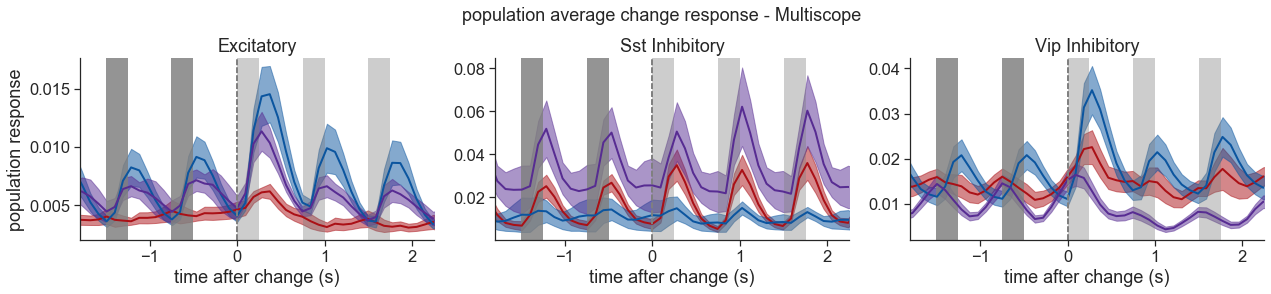

In [29]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = df[df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### plot population average with exposure number 

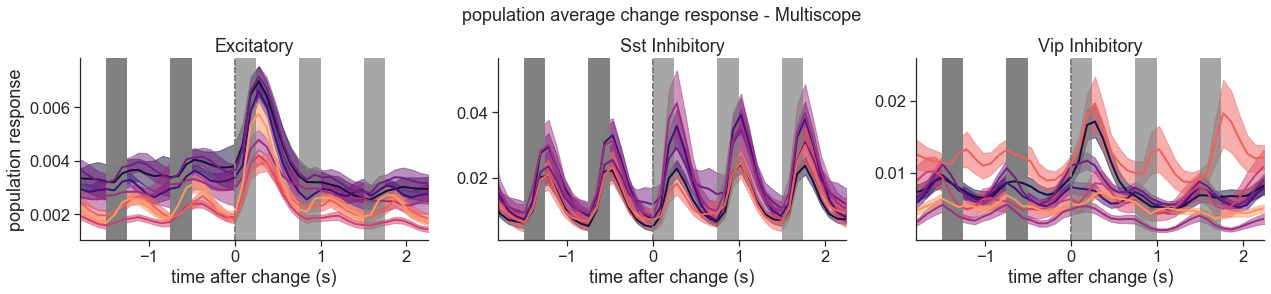

In [31]:
hue_column = 'prior_exposures_to_omissions'
axes_column= 'cell_type'
palette = sns.color_palette('magma',8)
xlim_seconds = [-1.8,2.25]

df = multi_session_df.copy()
df = df[df.experience_level=='Familiar']
df = df[df.prior_exposures_to_omissions<=6]

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### plot population average across cell types

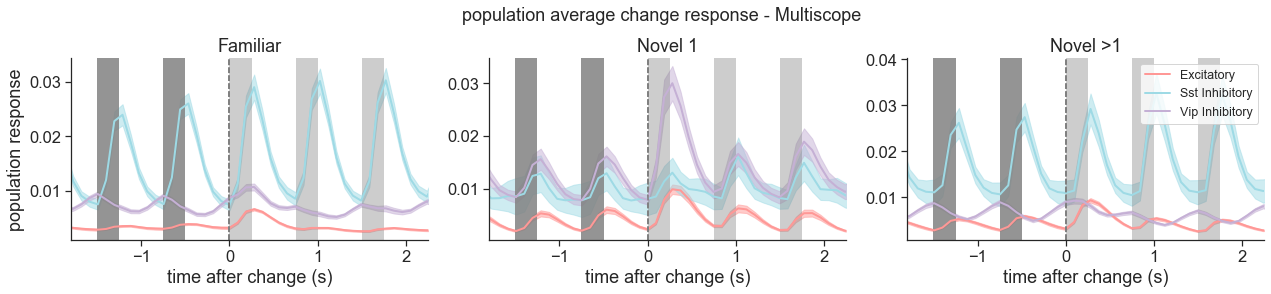

In [40]:
axes_column = 'experience_level'
hue_column = 'cell_type'
palette = utils.get_cre_line_colors()
xlim_seconds = [-1.8,2.25]

df = multi_session_df.copy()

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)


### plot cell response heatmaps

3 3


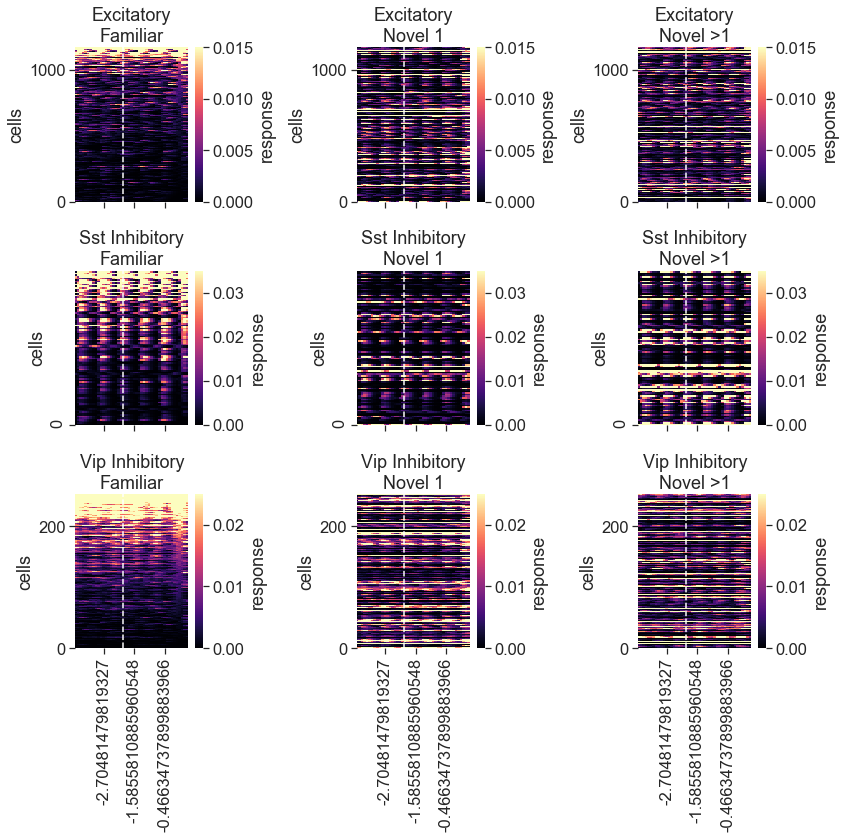

In [120]:
sdf = multi_session_df.copy()
sdf = utilities.limit_to_last_familiar_second_novel_active(sdf)
sdf = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(sdf)

row_condition = 'cell_type'
col_condition = 'experience_level'
xlim_seconds = [(3-1.8)*11,(3+2.25)*11]

ppf.plot_response_heatmaps_for_conditions(sdf, df_name, timestamps,
                                        row_condition, col_condition, use_events, filter_events, project_code=project_code,
                                        microscope='Multiscope', vmax=0.04, xlim_seconds=xlim_seconds, 
                                        match_cells=True, save_dir=None, folder=None)